## **Convolutional Neural Network**
### Why Convolutional Neural Network?

Inspiration: [Facial Expression Recognition Based on TensorFlow Platform ](https://www.itm-conferences.org/articles/itmconf/pdf/2017/04/itmconf_ita2017_01005.pdf)

This article describes achiving a mean accuracy of 97,81% in emotion recognition usig CNN method and transfer learning techniques, not included in this notebook. In reaching so high accuracy contributed usage of the large and high quality dataset [CK+](https://ieeexplore.ieee.org/document/5543262).

Model created in this notebook uses reccomended in the Tensorflow documentation parameters.

In [13]:
import ast
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load data from the file
After preprocessing data using data-preprocessing.ipynb there is possibility to download pickle with emotion label, usage and array with image pixels.

In [ ]:
df = pd.read_pickle("../data/icml_face_data_procc.csv")
df.head()

### Preparing data

In this notebook data splitting is done using feature 'usage' provided by dataset author. Then data are transformed into readable for NN numpy array format.

In [22]:
df_train = df.loc[df['usage'] == 'Training']
df_val = df.loc[df['usage'] == 'PrivateTest']
df_test = df.loc[df['usage'] == 'PublicTest']

In [23]:
def create_image_and_label_arrays(df: pd.core.frame.DataFrame) -> (np.ndarray, np.ndarray):
    images = df['pixels'].to_numpy()
    images = np.concatenate(images).reshape((images.shape[0],48,48,1))
    labels = df['emotion'].to_numpy()
    return images, labels

images_train, labels_train = create_image_and_label_arrays(df_train)
images_val, labels_val = create_image_and_label_arrays(df_val)
images_test, labels_test = create_image_and_label_arrays(df_test)

### Let's create the model!
Inspiratinon: [Tensorflow docs](https://www.tensorflow.org/tutorials/images/classification)

In [25]:
emotion_classes = len(df['emotion'].unique())
img_height, img_width = 48, 48

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(emotion_classes)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [28]:
class_weight = dict(zip(range(0, 7), (((df[df['usage']=='Training']['emotion'].value_counts()).sort_index())/len(df[df['usage']=='Training']['emotion'])).tolist()))

In [29]:
# Train the model
epochs=10
history = model.fit(
  images_train, labels_train,
  validation_data=(images_val, labels_val),
  class_weight = class_weight,
  epochs=epochs
)

Epoch 1/10
898/898 [==============================] - 26s 28ms/step - loss: 0.2732 - accuracy: 0.3050 - val_loss: 1.5544 - val_accuracy: 0.4257
Epoch 2/10
898/898 [==============================] - 24s 27ms/step - loss: 0.2248 - accuracy: 0.4420 - val_loss: 1.3858 - val_accuracy: 0.4737
Epoch 3/10
898/898 [==============================] - 25s 28ms/step - loss: 0.2032 - accuracy: 0.4955 - val_loss: 1.3285 - val_accuracy: 0.4999
Epoch 4/10
898/898 [==============================] - 25s 28ms/step - loss: 0.1875 - accuracy: 0.5390 - val_loss: 1.2927 - val_accuracy: 0.5074
Epoch 5/10
898/898 [==============================] - 24s 27ms/step - loss: 0.1734 - accuracy: 0.5766 - val_loss: 1.2867 - val_accuracy: 0.5238
Epoch 6/10
898/898 [==============================] - 27s 30ms/step - loss: 0.1625 - accuracy: 0.6018 - val_loss: 1.2837 - val_accuracy: 0.5297
Epoch 7/10
898/898 [==============================] - 24s 27ms/step - loss: 0.1502 - accuracy: 0.6326 - val_loss: 1.2781 - val_accuracy:

### Validation
After training the model, its accuracy is measured.

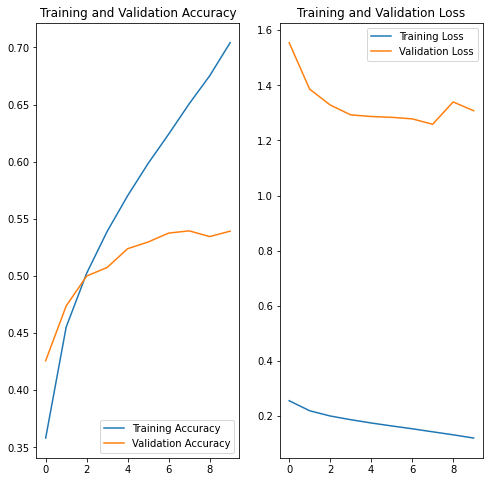

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Summary
In the pictures we can see that at the beginning a validation accuracy is close to the training one, but then they become so divergent.
This model needs a lot of improvement and research to gain accuracy mentioned in the article.